# Image Classification Using CNN

## Libraries

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-11-22 13:52:53.201985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763812373.309997   15056 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763812373.342607   15056 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763812373.585703   15056 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763812373.585730   15056 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763812373.585732   15056 computation_placer.cc:177] computation placer alr

## Loading Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Normalization

In [3]:
train_images = train_images/255.0
test_images = test_images/255.0

## Class Labels

In [4]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

## Displaying First 25 Images

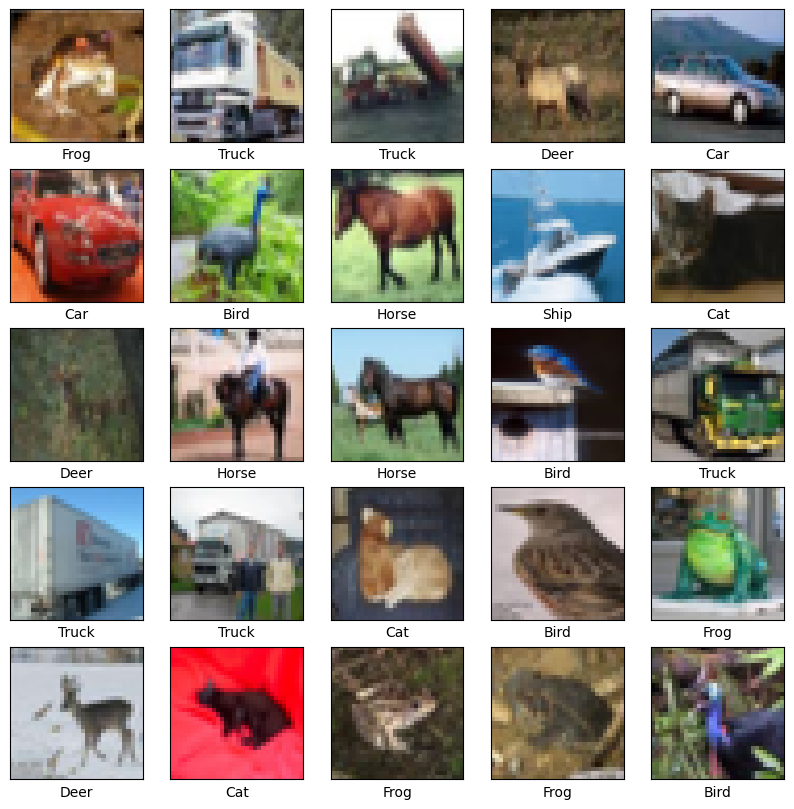

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Model Building

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

opt = optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/home/makrious/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763812381.905646   15056 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3584 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 668,842 (2.55 MB)

 Trainable params: 667,690 (2.55 MB)

 Non-trainable params: 1,152 (4.50 KB)

## Data Augmentation To Improve Performance

In [7]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

## Callbacks

In [8]:
checkpoint_cb = callbacks.ModelCheckpoint(
        filepath='../model/best_model.h5',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
)

reduce_lr_cb = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    mode='min',
    verbose=1
)

early_stop_cb = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    mode='min',
    verbose=1
)

cb_list = [checkpoint_cb, reduce_lr_cb, early_stop_cb]

## Model Training

In [9]:
batch_size = 64
steps_per_epoch = train_images.shape[0] // batch_size
print(steps_per_epoch)

781


In [10]:
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    epochs=50,
    validation_data=(test_images, test_labels),
    steps_per_epoch=steps_per_epoch,
    callbacks=cb_list
)

Epoch 1/50


/home/makrious/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1763812387.702124   15488 service.cc:152] XLA service 0x70f778002830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763812387.702181   15488 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-11-22 13:53:07.833103: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1763812388.358589   15488 cuda_dnn.cc:529] Loaded cuDNN version 91400


  3/781 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.1380 - loss: 3.7140   

I0000 00:00:1763812395.931614   15488 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3333 - loss: 2.0904
Epoch 1: val_accuracy improved from None to 0.50440, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.4091 - loss: 1.7225 - val_accuracy: 0.5044 - val_loss: 1.3993 - learning_rate: 0.0010
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4688 - loss: 1.4565

/home/makrious/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.50440 to 0.50590, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4688 - loss: 1.4565 - val_accuracy: 0.5059 - val_loss: 1.4044 - learning_rate: 0.0010
Epoch 3/50
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5434 - loss: 1.2728
Epoch 3: val_accuracy improved from 0.50590 to 0.62830, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5655 - loss: 1.2163 - val_accuracy: 0.6283 - val_loss: 1.0919 - learning_rate: 0.0010
Epoch 4/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6406 - loss: 1.0393
Epoch 4: val_accuracy did not improve from 0.62830
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6406 - loss: 1.0393 - val_accuracy: 0.6144 - val_loss: 1.1471 - learning_rate: 0.0010
Epoch 5/50
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6136 - loss: 1.0850
Epoch 5: val_accuracy did not improve from 0.62830
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6268 - loss: 1.0551 - val_accuracy: 0.6054 - val_loss: 1.1691 - learning_rate: 0.0010
Epoch 6/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6250 - loss: 0.9506
Epoch 6: val_accuracy did not improve from 0.62830

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6250 - loss: 0.9506 - val

781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6727 - loss: 0.9330 - val_accuracy: 0.6449 - val_loss: 1.0558 - learning_rate: 5.0000e-04
Epoch 8/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5625 - loss: 1.1591
Epoch 8: val_accuracy did not improve from 0.64490
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5625 - loss: 1.1591 - val_accuracy: 0.6352 - val_loss: 1.0944 - learning_rate: 5.0000e-04
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6915 - loss: 0.8844
Epoch 9: val_accuracy improved from 0.64490 to 0.69040, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6948 - loss: 0.8799 - val_accuracy: 0.6904 - val_loss: 0.9191 - learning_rate: 5.0000e-04
Epoch 10/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6250 - loss: 1.0258
Epoch 10: val_accuracy did not improve from 0.69040
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6250 - loss: 1.0258 - val_accuracy: 0.6895 - val_loss: 0.9141 - learning_rate: 5.0000e-04
Epoch 11/50
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7032 - loss: 0.8534
Epoch 11: val_accuracy improved from 0.69040 to 0.72870, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7043 - loss: 0.8503 - val_accuracy: 0.7287 - val_loss: 0.7767 - learning_rate: 5.0000e-04
Epoch 12/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7031 - loss: 0.7370
Epoch 12: val_accuracy did not improve from 0.72870
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7031 - loss: 0.7370 - val_accuracy: 0.7287 - val_loss: 0.7723 - learning_rate: 5.0000e-04
Epoch 13/50
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7159 - loss: 0.8220
Epoch 13: val_accuracy did not improve from 0.72870
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7174 - loss: 0.8205 - val_accuracy: 0.7220 - val_loss: 0.8015 - learning_rate: 5.0000e-04
Epoch 14/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7812 - loss: 0.7337
Epoch 14: val_accuracy did not improve from 0.72870
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 0.7337 - val_accuracy: 0.7206 - val_loss: 0.8048 - learning_rate: 5.000

781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7232 - loss: 0.7937 - val_accuracy: 0.7404 - val_loss: 0.7634 - learning_rate: 5.0000e-04
Epoch 16/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7500 - loss: 0.7558
Epoch 16: val_accuracy improved from 0.74040 to 0.74050, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.7558 - val_accuracy: 0.7405 - val_loss: 0.7586 - learning_rate: 5.0000e-04
Epoch 17/50
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7356 - loss: 0.7542
Epoch 17: val_accuracy improved from 0.74050 to 0.75250, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.7327 - loss: 0.7628 - val_accuracy: 0.7525 - val_loss: 0.7328 - learning_rate: 5.0000e-04
Epoch 18/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8750 - loss: 0.6009
Epoch 18: val_accuracy improved from 0.75250 to 0.75390, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.6009 - val_accuracy: 0.7539 - val_loss: 0.7320 - learning_rate: 5.0000e-04
Epoch 19/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7402 - loss: 0.7492
Epoch 19: val_accuracy did not improve from 0.75390
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7387 - loss: 0.7489 - val_accuracy: 0.7515 - val_loss: 0.7483 - learning_rate: 5.0000e-04
Epoch 20/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7188 - loss: 0.7838
Epoch 20: val_accuracy did not improve from 0.75390
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7188 - loss: 0.7838 - val_accuracy: 0.7524 - val_loss: 0.7459 - learning_rate: 5.0000e-04
Epoch 21/50
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7521 - loss: 0.7177
Epoch 21: val_accuracy improved from 0.75390 to 0.77430, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7490 - loss: 0.7258 - val_accuracy: 0.7743 - val_loss: 0.6684 - learning_rate: 5.0000e-04
Epoch 22/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7656 - loss: 0.6556
Epoch 22: val_accuracy improved from 0.77430 to 0.77560, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7656 - loss: 0.6556 - val_accuracy: 0.7756 - val_loss: 0.6643 - learning_rate: 5.0000e-04
Epoch 23/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7542 - loss: 0.7049
Epoch 23: val_accuracy did not improve from 0.77560
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7527 - loss: 0.7103 - val_accuracy: 0.7440 - val_loss: 0.7581 - learning_rate: 5.0000e-04
Epoch 24/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7812 - loss: 0.7015
Epoch 24: val_accuracy did not improve from 0.77560
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7812 - loss: 0.7015 - val_accuracy: 0.7461 - val_loss: 0.7560 - learning_rate: 5.0000e-04
Epoch 25/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7604 - loss: 0.6979
Epoch 25: val_accuracy improved from 0.77560 to 0.79520, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7612 - loss: 0.6945 - val_accuracy: 0.7952 - val_loss: 0.6058 - learning_rate: 5.0000e-04
Epoch 26/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7812 - loss: 0.6942
Epoch 26: val_accuracy improved from 0.79520 to 0.79730, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 0.6942 - val_accuracy: 0.7973 - val_loss: 0.5987 - learning_rate: 5.0000e-04
Epoch 27/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7669 - loss: 0.6745
Epoch 27: val_accuracy did not improve from 0.79730
781/781 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.7637 - loss: 0.6844 - val_accuracy: 0.7742 - val_loss: 0.6705 - learning_rate: 5.0000e-04
Epoch 28/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7500 - loss: 0.6904
Epoch 28: val_accuracy did not improve from 0.79730
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7500 - loss: 0.6904 - val_accuracy: 0.7701 - val_loss: 0.6805 - learning_rate: 5.0000e-04
Epoch 29/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7726 - loss: 0.6628
Epoch 29: val_accuracy did not improve from 0.79730

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
781/781 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.7698 - 

781/781 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7868 - loss: 0.6171 - val_accuracy: 0.8136 - val_loss: 0.5521 - learning_rate: 1.2500e-04
Epoch 34/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7188 - loss: 0.7984
Epoch 34: val_accuracy improved from 0.81360 to 0.81480, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7188 - loss: 0.7984 - val_accuracy: 0.8148 - val_loss: 0.5501 - learning_rate: 1.2500e-04
Epoch 35/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7915 - loss: 0.6058
Epoch 35: val_accuracy did not improve from 0.81480
781/781 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7923 - loss: 0.6017 - val_accuracy: 0.8086 - val_loss: 0.5621 - learning_rate: 1.2500e-04
Epoch 36/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.8906 - loss: 0.4462
Epoch 36: val_accuracy did not improve from 0.81480
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8906 - loss: 0.4462 - val_accuracy: 0.8081 - val_loss: 0.5641 - learning_rate: 1.2500e-04
Epoch 37/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7909 - loss: 0.6069
Epoch 37: val_accuracy improved from 0.81480 to 0.82170, saving model to best_model.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.7929 - loss: 0.5995 - val_accuracy: 0.8217 - val_loss: 0.5304 - learning_rate: 1.2500e-04
Epoch 38/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.8438 - loss: 0.4824
Epoch 38: val_accuracy did not improve from 0.82170
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8438 - loss: 0.4824 - val_accuracy: 0.8215 - val_loss: 0.5316 - learning_rate: 1.2500e-04
Epoch 39/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7960 - loss: 0.5929
Epoch 39: val_accuracy did not improve from 0.82170
781/781 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7959 - loss: 0.5926 - val_accuracy: 0.8127 - val_loss: 0.5618 - learning_rate: 1.2500e-04
Epoch 40/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8281 - loss: 0.5006
Epoch 40: val_accuracy did not improve from 0.82170

Epoch 40: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8281 - 

## Model Evaluation

In [11]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {accuracy}")
print(f"Loss: {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8217 - loss: 0.5304
Test accuracy: 0.8216999769210815
Loss: 0.5304163694381714


---